In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ConfigParser import SafeConfigParser

%matplotlib inline

Read the location of the detected points from the config file

In [3]:
parser = SafeConfigParser()
parser.read("../config.ini")

['../config.ini']

In [37]:
prefix = parser.get("Misc", "prefix")
location = parser.get("Misc", "location")
width = int(parser.get("Image", "width"))
height = int(parser.get("Image", "height"))

output_folder = location + "/" + prefix 
detected_processed_filename = prefix + "_processed_" + parser.get("Detection", "detected_filename")

fn = output_folder + "/" + detected_processed_filename

Load the detected points into a numpy array

In [38]:
detected = np.loadtxt(fn, delimiter=",")

In [24]:
#taken from image_generator/test_image.py
def make_source(src_array, height, width):

    """ 
    Returns the source image with numpy format

    Parameters
    ----------
    src_array : array
        Array of source objects in format [X,Y,A,R]
    height : int
        height of the image
    width : int
        width of the image
    display : bool
        whether or not to display the plot

    Returns
    -------
    z : array
        Source image in numpy format
    """

    x = np.arange(0, width)
    y = np.arange(0, height)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.zeros((height,width),float)
    for i in src_array:
        z+= i[2]*np.exp(-1*((xx-i[0])**2+(yy-i[1])**2)/(2*(i[3]**2)))
    return z

Create a image from that

In [39]:
img = make_source(detected[:,:4], height, width)

Plot the image

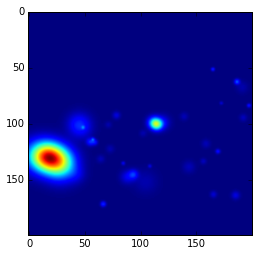

In [40]:
plt.imshow(np.flipud(img))